# Time Series Model Validation Demo

## 1. Introduction

## 2. Setup 

### Import Libraries

In [8]:
# Load API key and secret from environment variables
%load_ext dotenv
%dotenv .env

# ValidMind libraries 
import validmind as vm

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


### Connect to the ValidMind Library

In [9]:
vm.init(
  api_host = "http://localhost:3000/api/v1/tracking",
  project = "clhhz04x40000wcy6shay2oco"
)

Connected to ValidMind. Project: Customer Churn Model - Initial Validation (clhhz04x40000wcy6shay2oco)


### Find All Test Plans Available in the Developer Framework

In [10]:
vm.test_plans.list_plans()

ID,Name,Description
binary_classifier_metrics,BinaryClassifierMetrics,Test plan for sklearn classifier metrics
binary_classifier_validation,BinaryClassifierPerformance,Test plan for sklearn classifier models
binary_classifier_model_diagnosis,BinaryClassifierDiagnosis,Test plan for sklearn classifier model diagnosis tests
binary_classifier,BinaryClassifier,Test plan for sklearn classifier models that includes both metrics and validation tests
tabular_dataset,TabularDataset,Test plan for generic tabular datasets
tabular_dataset_description,TabularDatasetDescription,Test plan to extract metadata and descriptive statistics from a tabular dataset
tabular_data_quality,TabularDataQuality,Test plan for data quality on tabular datasets
normality_test_plan,NormalityTestPlan,Test plan to perform normality tests.
autocorrelation_test_plan,AutocorrelationTestPlan,Test plan to perform autocorrelation tests.
seasonality_test_plan,SesonalityTestPlan,Test plan to perform seasonality tests.


## 3. Load Models

#### Load Pre-Trained Time Series Models

In [11]:
# Currently only fred pre-trained models are available
from validmind.datasets.regression import fred as demo_models
models = demo_models.load_models()

#### Load Train Dataset

In [12]:
train_df = demo_models.load_train_dataset()
train_df.head()

,MORTGAGE30US,GS10,FEDFUNDS,UNRATE
DATE,,,,
1971-05-01,0.17,0.56,0.47,0.0
1971-06-01,0.08,0.13,0.28,0.0
1971-07-01,0.15,0.21,0.40,0.1
1971-08-01,0.00,-0.15,0.26,0.1
1971-09-01,-0.02,-0.44,-0.02,-0.1


In [13]:
train_df.tail()

,MORTGAGE30US,GS10,FEDFUNDS,UNRATE
DATE,,,,
2012-06-01,-0.09,-0.18,0.00,0.0
2012-07-01,-0.17,-0.09,0.00,0.0
2012-08-01,0.10,0.15,-0.03,-0.1
2012-09-01,-0.19,0.04,0.01,-0.3
2012-10-01,0.01,0.03,0.02,0.0


#### Load Test Dataset

In [14]:
test_df = demo_models.load_test_dataset()
test_df.head()

,MORTGAGE30US,UNRATE,GS10,FEDFUNDS
DATE,,,,
2012-12-01,0.03,0.2,0.07,0.00
2013-01-01,0.18,0.1,0.19,-0.02
2013-02-01,-0.02,-0.3,0.07,0.01
2013-03-01,0.06,-0.2,-0.02,-0.01
2013-04-01,-0.17,0.1,-0.20,0.01


#### Create ValidMind Datasets

In [15]:
vm_train_ds = vm.init_dataset(dataset=train_df, type="generic")
vm_test_ds = vm.init_dataset(dataset=test_df, type="generic")

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...
Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


## 4. Model Diagnosis

## 5. Model Evaluation

### Performance across Models

### Forecast vs Observed across Models 

#### **Run Time Series Forecast Test Plan**

In [16]:
vm.test_plans.describe_plan("time_series_forecast")

Attribute,Value
ID,time_series_forecast
Name,TimeSeriesForecast
Description,Test plan to perform time series forecast tests.
Required Context,"['models', 'test_ds']"
Tests,ModelPredictionOLS (Metric)
Test Plans,[]


In [17]:
vm_model_1 = vm.init_model(models['fred_loan_rates_model_1'])
vm_model_3 = vm.init_model(models['fred_loan_rates_model_3'])
list_of_models = [vm_model_1, vm_model_3]

Running Metric: model_prediction_ols:   0%|          | 0/1 [00:00<?, ?it/s]     

2010-01-01



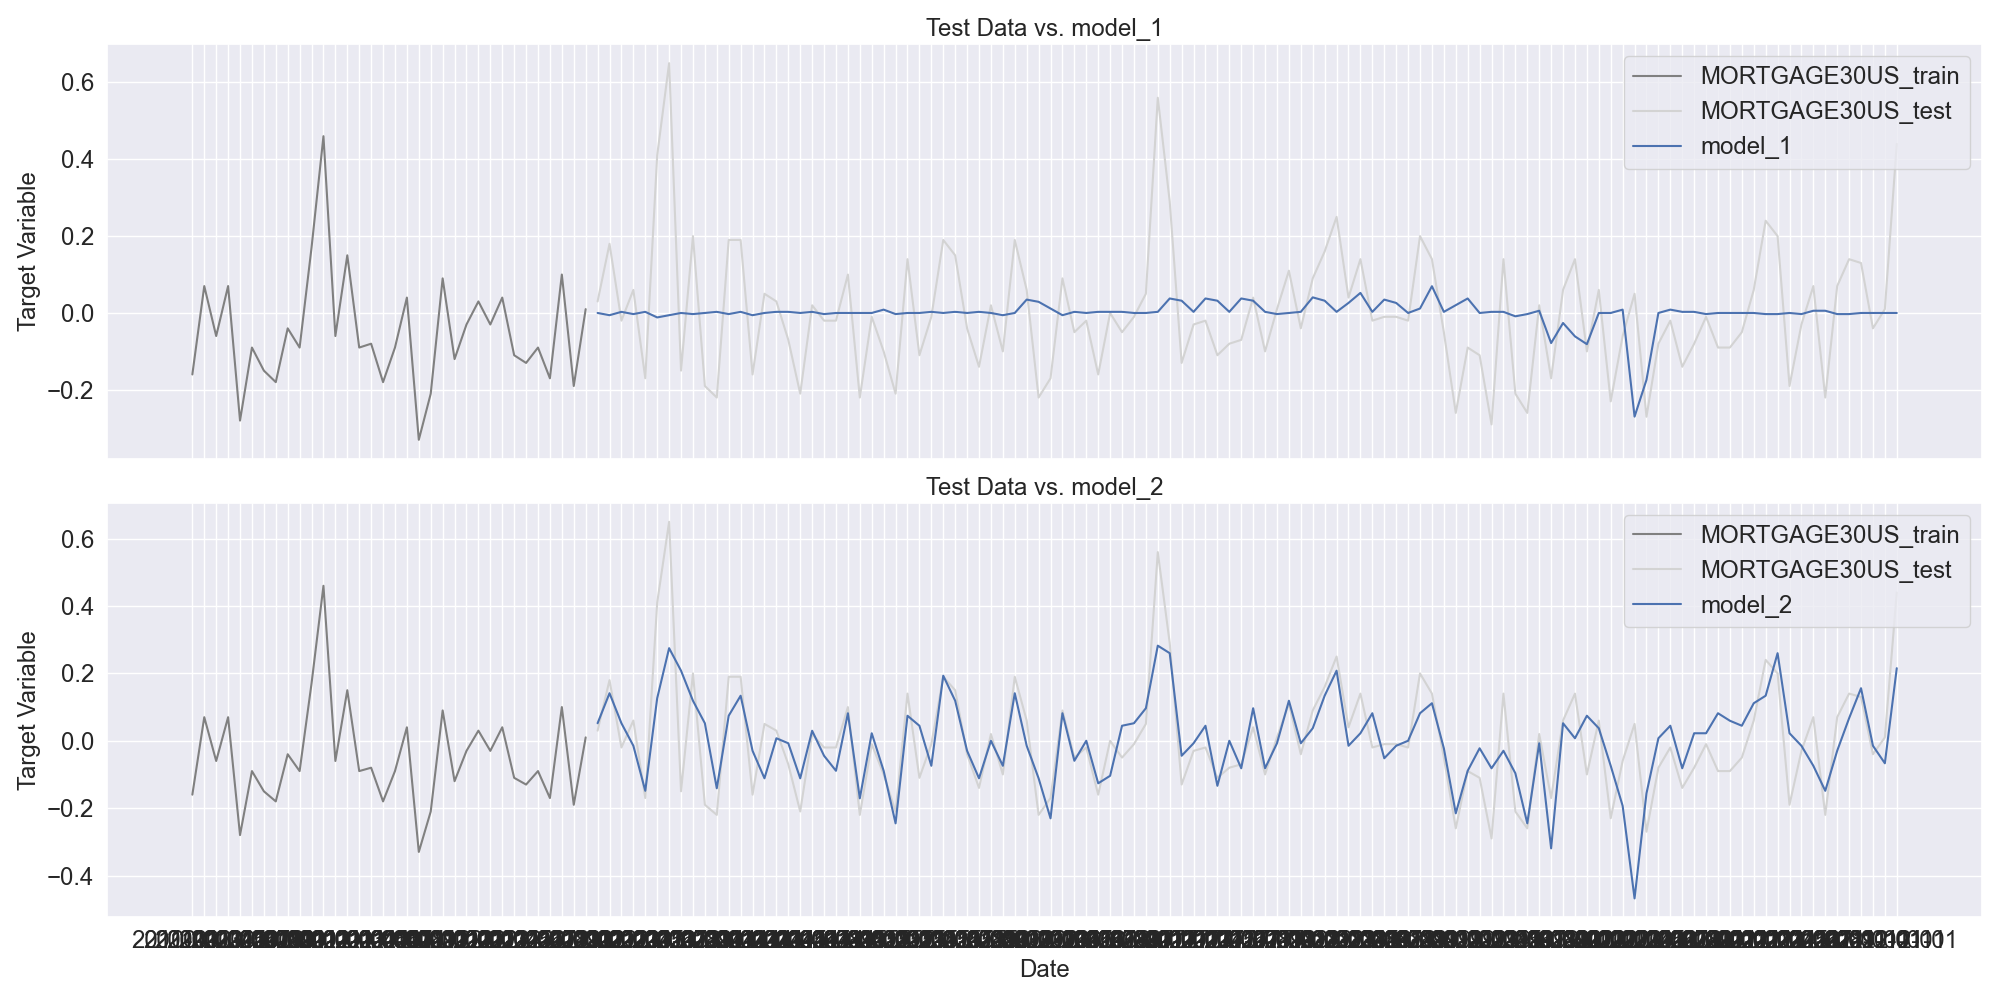

TimeSeriesForecast(test_context=TestContext(dataset=None, model=None, models=[Model(attributes=ModelAttributes(architecture=None, framework=None, framework_version=None), task=None, subtask=None, params=None, model_id='main', model=<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x28d5d7af0>), Model(attributes=ModelAttributes(architecture=None, framework=None, framework_version=None), task=None, subtask=None, params=None, model_id='main', model=<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1079b3a90>)], train_ds=None, test_ds=Dataset(raw_dataset=            MORTGAGE30US  UNRATE  GS10  FEDFUNDS
DATE                                            
2012-12-01          0.03     0.2  0.07      0.00
2013-01-01          0.18     0.1  0.19     -0.02
2013-02-01         -0.02    -0.3  0.07      0.01
2013-03-01          0.06    -0.2 -0.02     -0.01
2013-04-01         -0.17     0.1 -0.20      0.01
...                  ...     ...   ...       ...
2022

In [18]:
config= {
    "model_prediction_ols": {
        "plot_start_date": '2010-01-01',
        "plot_end_date": '2022-01-01'
    }
}

vm.run_test_plan("time_series_forecast",
                                        models=list_of_models,
                                        test_ds=vm_test_ds,
                                        config=config)